In [1]:
#importing several helpful packages
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
from builtins import list
import matplotlib
matplotlib.style.use('ggplot')
import seaborn as sns

import datetime

%matplotlib inline

In [2]:
Mehak_df=pd.read_csv(r'C:\Users\mehak\OneDrive\Desktop\MBA  LPU\Assignments\Semester 2\Questions\CA 1\INTM\My Uber Drives 2016.csv')
Mehak_df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
Mehak_df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [5]:
#deleting unnecessary data aka the last row
Mehak_df=Mehak_df[:-1]
Mehak_df.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Kar?chi,Kar?chi,0.8,Customer Visit
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site


In [6]:
#checking for duplicate records
Mehak_df[Mehak_df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [7]:
#deleting the duplicate record
Mehak_df.drop_duplicates(inplace=True)

In [8]:
#getting information about the dataset
Mehak_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1153 entries, 0 to 1153
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1153 non-null   object 
 1   END_DATE*    1153 non-null   object 
 2   CATEGORY*    1153 non-null   object 
 3   START*       1153 non-null   object 
 4   STOP*        1153 non-null   object 
 5   MILES*       1153 non-null   float64
 6   PURPOSE*     651 non-null    object 
dtypes: float64(1), object(6)
memory usage: 72.1+ KB


In [9]:
Mehak_df.columns = ['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES', 'PURPOSE']
print(Mehak_df.columns);

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')


In [10]:
#the start and end dates should be in date format, however, they are shown as object. 
#this needs to be fixed before proceeding with the data analysis
Mehak_df['START_DATE'] = pd.to_datetime(Mehak_df['START_DATE'])
Mehak_df['END_DATE'] = pd.to_datetime(Mehak_df['END_DATE'])
Mehak_df.info();

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1153 entries, 0 to 1153
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1153 non-null   datetime64[ns]
 1   END_DATE    1153 non-null   datetime64[ns]
 2   CATEGORY    1153 non-null   object        
 3   START       1153 non-null   object        
 4   STOP        1153 non-null   object        
 5   MILES       1153 non-null   float64       
 6   PURPOSE     651 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 72.1+ KB


In [11]:
#checking for cancelled rides or rides where the duration is zero
filtered_data = Mehak_df[Mehak_df["END_DATE"]==Mehak_df["START_DATE"]]
print(filtered_data)

             START_DATE            END_DATE  CATEGORY             START  \
751 2016-09-06 17:49:00 2016-09-06 17:49:00  Business  Unknown Location   
761 2016-09-16 07:08:00 2016-09-16 07:08:00  Business  Unknown Location   
798 2016-10-08 15:03:00 2016-10-08 15:03:00  Business           Karachi   
807 2016-10-13 13:02:00 2016-10-13 13:02:00  Business         Islamabad   

                 STOP  MILES PURPOSE  
751  Unknown Location   69.1     NaN  
761  Unknown Location    1.6     NaN  
798           Karachi    3.6     NaN  
807         Islamabad    0.7     NaN  


In [12]:
len(filtered_data)

4

In [13]:
#creating a new dataframe for analysis pruposes
AdjMehak_df = Mehak_df

In [14]:
#dropping the rows where the rides are cancelled
AdjMehak_df.drop([751,761,798,807], axis=0, inplace=True)

In [15]:
AdjMehak_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1149 entries, 0 to 1153
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1149 non-null   datetime64[ns]
 1   END_DATE    1149 non-null   datetime64[ns]
 2   CATEGORY    1149 non-null   object        
 3   START       1149 non-null   object        
 4   STOP        1149 non-null   object        
 5   MILES       1149 non-null   float64       
 6   PURPOSE     651 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 71.8+ KB


In [16]:
sns.set_style="whitegrid"

In [17]:
Category_labels = AdjMehak_df.CATEGORY.value_counts()
print(Category_labels);

Business    1072
Personal      77
Name: CATEGORY, dtype: int64


Text(0.5, 1.0, 'Number of trips for each category')

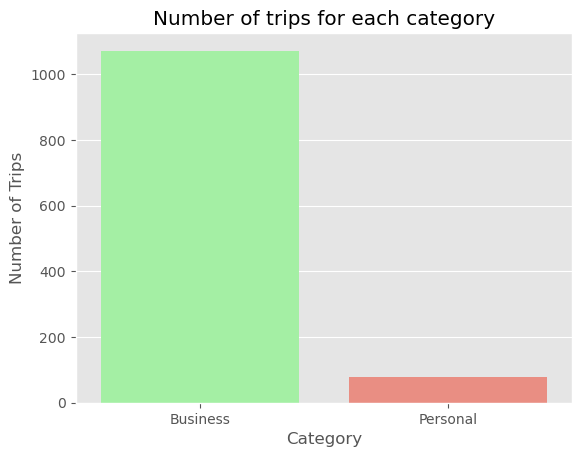

In [18]:
#number of trips for category
sns.barplot(x=Category_labels.index, y=Category_labels, palette = ['palegreen','salmon'])
plt.xlabel('Category')
plt.ylabel('Number of Trips')
plt.title('Number of trips for each category')

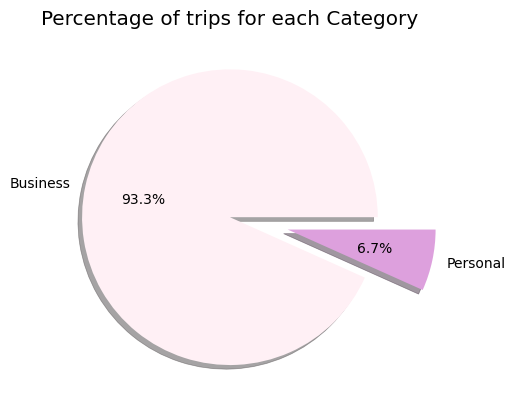

In [19]:
#percentage for each category
category_value = AdjMehak_df['CATEGORY'].value_counts()
labels_category=category_value.index
explode = (0,0.4)
colors = ('lavenderblush','plum')
plt.pie(category_value, labels=labels_category, explode = explode, colors = colors, autopct='%1.1f%%', shadow=True)
plt.title("Percentage of trips for each Category");

In [20]:
#checking thr color palette
sns.color_palette()

[(0.8862745098039215, 0.2901960784313726, 0.2),
 (0.20392156862745098, 0.5411764705882353, 0.7411764705882353),
 (0.596078431372549, 0.5568627450980392, 0.8352941176470589),
 (0.4666666666666667, 0.4666666666666667, 0.4666666666666667),
 (0.984313725490196, 0.7568627450980392, 0.3686274509803922),
 (0.5568627450980392, 0.7294117647058823, 0.25882352941176473),
 (1.0, 0.7098039215686275, 0.7215686274509804)]

In [21]:
#changing color palette
sns.set_palette("pastel")
sns.color_palette()

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

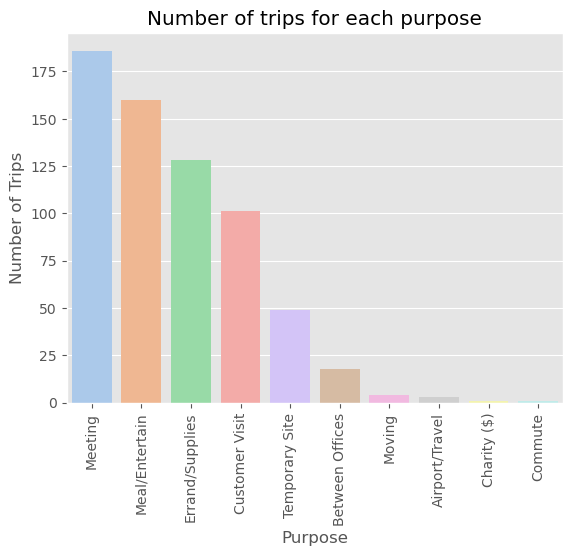

In [22]:
#number of trips for each purpose
purpose_labels = AdjMehak_df.PURPOSE.value_counts()
sns.barplot(x=purpose_labels.index, y=purpose_labels)
plt.xlabel('Purpose')
plt.ylabel('Number of Trips')
plt.title('Number of trips for each purpose');
plt.xticks(rotation=90);

In [23]:
#extracting month from start date
AdjMehak_df['MONTH'] = pd.DatetimeIndex(AdjMehak_df['START_DATE']).month
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April', 5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug', 9.0: 'Sep',
      10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec' }
AdjMehak_df["MONTH"] = AdjMehak_df.MONTH.map(month_label)
AdjMehak_df.MONTH.unique()

array(['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

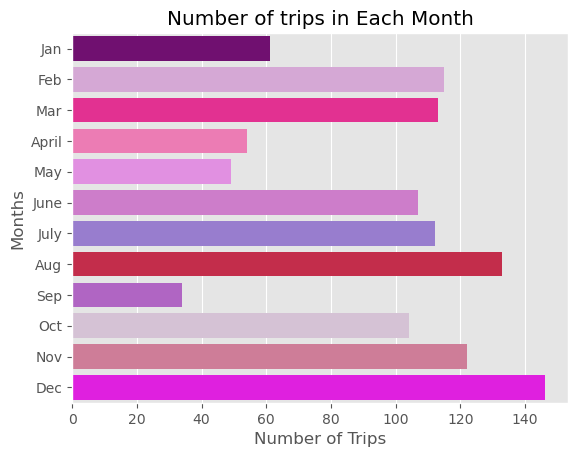

In [23]:
# plot number of trips at each month
month_count =AdjMehak_df.MONTH.value_counts()
colors = ('purple','plum','deeppink','hotpink','violet','orchid','mediumpurple','crimson','mediumorchid','thistle','palevioletred','magenta')
sns.barplot( x=month_count, y=month_count.index, order=['Jan','Feb','Mar','April','May','June','July','Aug','Sep','Oct','Nov','Dec'], palette = colors);
plt.xlabel('Number of Trips')
plt.ylabel('Months')
plt.title('Number of trips in Each Month');

In [33]:
#extracting day from start date
Mehak_df['DAY'] = pd.DatetimeIndex(Mehak_df['START_DATE']).day
day_label = {1.0: 'Mon', 2.0: 'Tues', 3.0: 'Wed', 4.0: 'Thurs', 5.0: 'Fri', 6.0: 'Sat', 7.0: 'Sun'}
Mehak_df["DAY"] = Mehak_df.DAY.map(day_label)
Mehak_df.DAY.unique()

array(['Mon', 'Tues', 'Fri', 'Sat', 'Sun', nan, 'Thurs', 'Wed'],
      dtype=object)

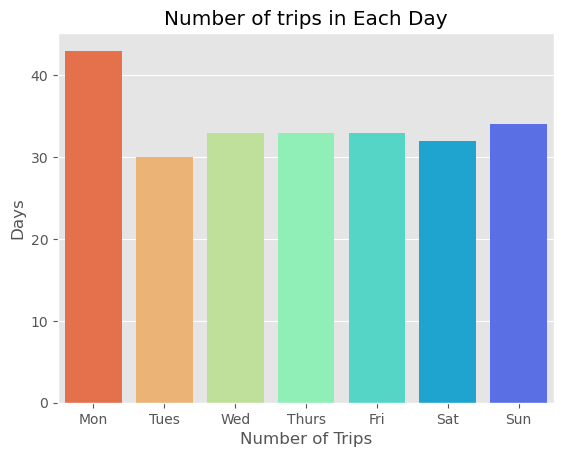

In [44]:
# plot number of trips on each day of the week
day_count =Mehak_df.DAY.value_counts()
colors = ('deeppink','hotpink','violet','orchid','mediumpurple','crimson','mediumorchid')
sns.barplot( y=day_count, x=day_count.index, order=['Mon','Tues','Wed','Thurs','Fri','Sat','Sun'], palette = 'rainbow_r');
plt.xlabel('Number of Trips')
plt.ylabel('Days')
plt.title('Number of trips in Each Day');

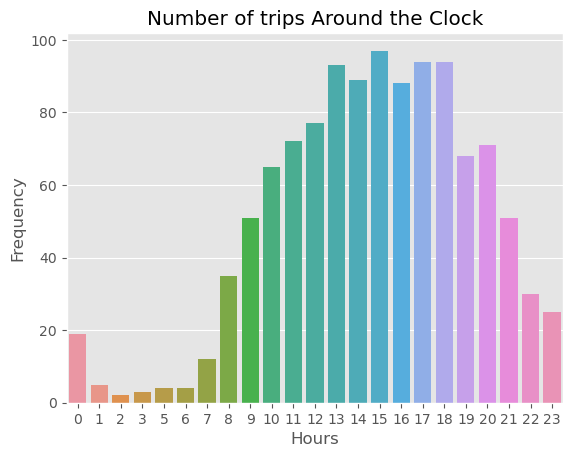

In [46]:
# I need to see how many trip made at each clock and as you see the clock which has the higest number of trips
hours = AdjMehak_df['START_DATE'].dt.hour.value_counts()
sns.barplot(x=hours.index, y=hours)
plt.xlabel('Hours')
plt.ylabel('Frequency')
plt.title('Number of trips Around the Clock');

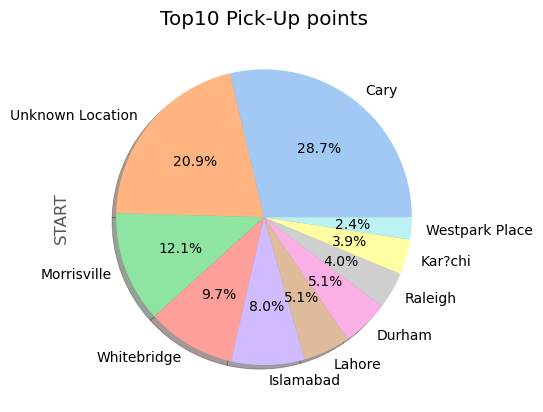

In [56]:
startpoints = AdjMehak_df['START'].value_counts().nlargest (10) 
startpoints.plot(kind='pie',autopct='%1.1f%%', shadow=True)
plt.title('Top10 Pick-Up points');

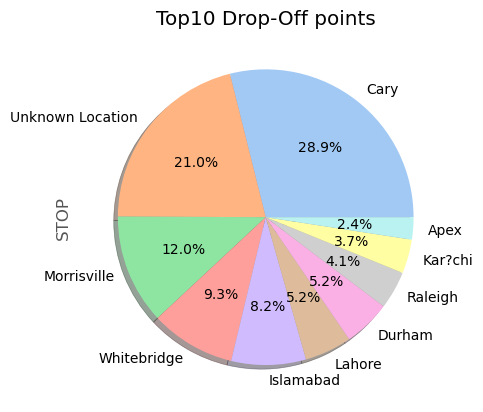

In [58]:
droppoints = AdjMehak_df['STOP'].value_counts().nlargest (10) 
droppoints.plot(kind='pie',autopct='%1.1f%%', shadow=True)
plt.title('Top10 Drop-Off points');

In [59]:
# calculate duration of each trip in minutes
minutes=[]
AdjMehak_df['DURATION_MINS'] = AdjMehak_df['END_DATE'] - AdjMehak_df['START_DATE']
AdjMehak_df['DURATION_MINS']
for x in AdjMehak_df['DURATION_MINS']:
    minutes.append(x.seconds / 60)

AdjMehak_df['DURATION_MINS'] = minutes

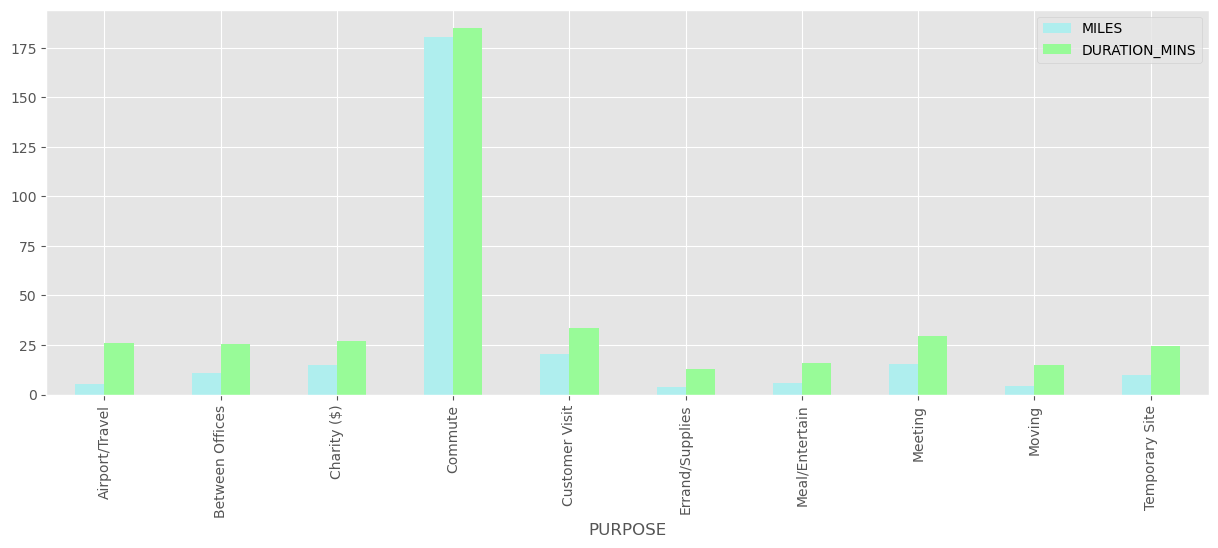

In [60]:
#average time and distance sorted by purpose
purpose = AdjMehak_df.groupby('PURPOSE').mean()
purpose.plot(kind = 'bar',figsize=(15,5), color = ('paleturquoise', 'palegreen'));

In [61]:
# calculate trip speed for each driver
AdjMehak_df['DURATION_HOURS'] = AdjMehak_df['DURATION_MINS'] / 60
AdjMehak_df['SPEED_KM'] = AdjMehak_df['MILES'] /AdjMehak_df['DURATION_HOURS']
AdjMehak_df['SPEED_KM']

0       51.000000
1       25.000000
2       22.153846
3       20.142857
4       57.044776
          ...    
1149    12.000000
1150     6.000000
1151    13.000000
1152    27.771429
1153    21.333333
Name: SPEED_KM, Length: 1149, dtype: float64

In [62]:
MinSpeed=AdjMehak_df['SPEED_KM'].min()
print(MinSpeed);

3.9173553719008267


In [63]:
AverageSpeed = AdjMehak_df['SPEED_KM'].mean()
print(AverageSpeed)

26.809245388012823


In [64]:
MaxSpeed=AdjMehak_df['SPEED_KM'].max()
print(MaxSpeed)

906.0


In [65]:
print(AdjMehak_df['SPEED_KM'].to_string())

0        51.000000
1        25.000000
2        22.153846
3        20.142857
4        57.044776
5        64.500000
6        85.200000
7         8.000000
8        24.900000
9        36.666667
10       15.069767
11       12.857143
12       18.600000
13       14.769231
14       13.714286
15        7.285714
16        8.769231
17        7.125000
18       15.000000
19        7.714286
20        9.600000
21       10.000000
22       15.620690
23       51.692308
24       25.285714
25       36.500000
26       39.000000
27       24.000000
28       31.200000
29       34.666667
30       26.181818
31       25.636364
32       30.857143
33       32.571429
34       29.314286
35       29.225806
36       44.666667
37       24.000000
38       18.000000
39       12.000000
40       13.333333
41       17.250000
42       14.250000
43       16.800000
44       15.000000
45       15.428571
46       38.689655
47       20.400000
48       20.250000
49       35.181818
50       35.625000
51       44.100000
52       31.

In [66]:
Avg=Mehak_df['MILES'].mean()
print(Avg)

10.506179286335929
